<a href="https://colab.research.google.com/github/BachokunIAR/ML_code/blob/main/Blood_transfusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn

import seaborn as sns
from sklearn import preprocessing
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [2]:
from google.colab import files
files.upload_file = files.upload()

Saving transfusion.data to transfusion.data


In [3]:
!ls


sample_data  transfusion.data


In [4]:
data = pd.read_csv("transfusion.data")
data

,Recency_months,Frequency_times,Monetary_blood,Time_months,donated_blood_or_not
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [5]:
data.isna().sum()

Recency_months          0
Frequency_times         0
Monetary_blood          0
Time_months             0
donated_blood_or_not    0
dtype: int64

In [6]:
data.describe()

,Recency_months,Frequency_times,Monetary_blood,Time_months,donated_blood_or_not
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Recency_months        748 non-null    int64
 1   Frequency_times       748 non-null    int64
 2   Monetary_blood        748 non-null    int64
 3   Time_months           748 non-null    int64
 4   donated_blood_or_not  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [8]:
data["donated_blood_or_not"].unique()

array([1, 0])

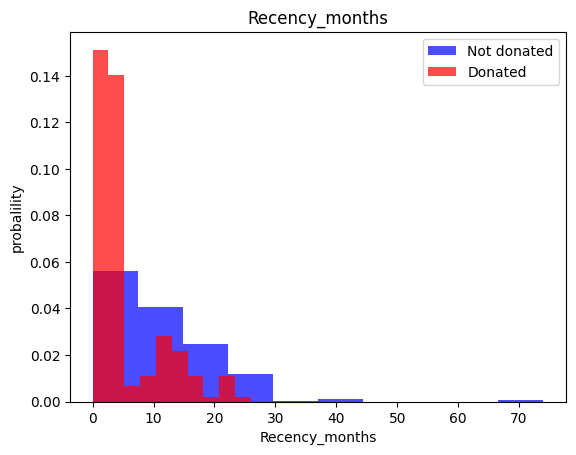

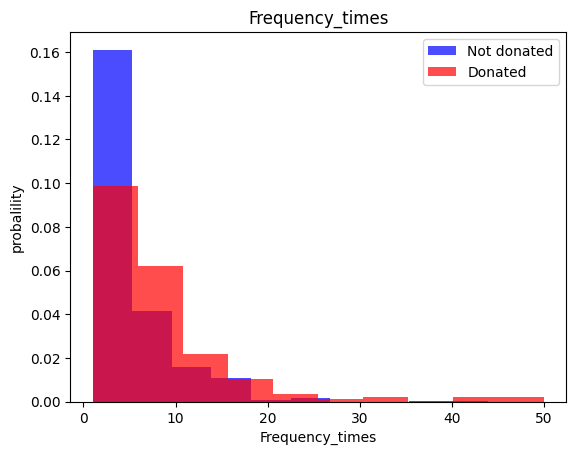

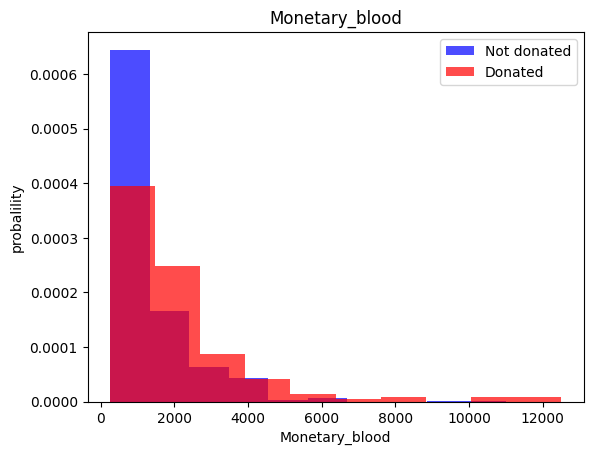

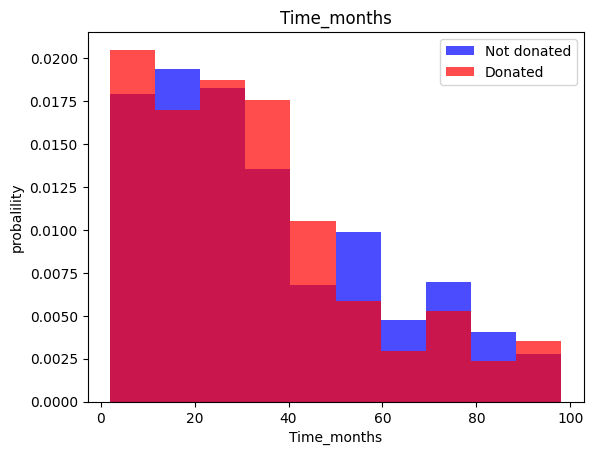

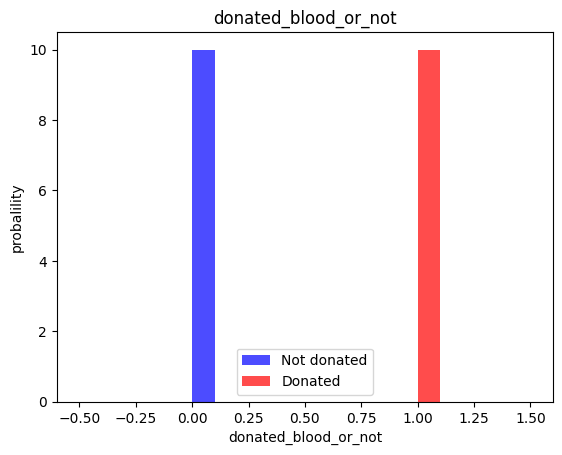

In [9]:
for label in data[:-1]:
  plt.hist(data[data["donated_blood_or_not"]==0][label], color ='blue',label = 'Not donated',
           alpha = 0.7, density = True)

  plt.hist(data[data["donated_blood_or_not"]==1][label], color = 'red', label = 'Donated', alpha = 0.7,
           density = True)
  plt.title(label)
  plt.ylabel("probalility")
  plt.xlabel(label)
  plt.legend()
  plt.show()

#<font color = red> Train, Test dataset, Validadition

In [10]:
from sklearn.preprocessing import StandardScaler

train, valid, test = np.split(data.sample(frac=1), [int(0.6*len(data)), int(0.8*len(data))])

def sacale_dataset(dataframe):
  x = dataframe[dataframe.cols[:-1]].values
  y = dataframe[dataframe.cols[-1]].values
  scaler = StandardScaler()
  x = scaler.fit_transform(x)
  data = np.hstack((x, np.reshape(y,(-1,1))))
  return data , x, y

In [11]:
train

,Recency_months,Frequency_times,Monetary_blood,Time_months,donated_blood_or_not
375,11,3,750,40,1
336,11,3,750,28,0
549,4,7,1750,32,1
488,21,2,500,41,0
10,4,23,5750,58,0
...,...,...,...,...,...
194,2,2,500,14,0
535,4,5,1250,16,1
37,4,6,1500,16,1
90,4,2,500,4,1


In [12]:
print(len(train[train["donated_blood_or_not"]==0]))
print(len(train[train["donated_blood_or_not"]==1]))

345
103


#<font color = red> Oversampling

The oversampling is done to make the number of  donated and not donated be equall.

In [13]:
from imblearn.over_sampling import RandomOverSampler

In [14]:
def scale_dataset(dataframe, oversample = False):

  x = dataframe[dataframe.columns[:-1]].values

  y = dataframe[dataframe.columns[-1]].values
  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  if oversample:
    ros = RandomOverSampler()
    x,y = ros.fit_resample(x,y)
  data = np.hstack((x,np.reshape(y,(-1,1))))

  return data , x, y


# <font color =red> Now the data has thesame numer of dataset for both satisfaction and dissatisfaction </font>

In [15]:
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid ,y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

In [16]:
sum(y_train ==0)


345

In [17]:
sum(y_train ==0)

345

# <font color = red> Instatiataing the model

In [18]:
# support vector machine
from sklearn.metrics import classification_report
from sklearn.svm import SVC
svm_model = SVC()

svm_model.fit(x_train,y_train)

SVC()

In [19]:
y_pred = svm_model.predict(x_test)

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.72      0.79       106
           1       0.53      0.77      0.63        44

    accuracy                           0.73       150
   macro avg       0.71      0.74      0.71       150
weighted avg       0.78      0.73      0.74       150



In [23]:
valid

array([[ 0.56943055, -0.24250627, -0.24250627,  0.2854761 ,  0.        ],
       [ 0.97360051,  0.43112227,  0.43112227,  1.08339067,  1.        ],
       [ 0.1652606 , -0.69159197, -0.69159197, -1.00005292,  0.        ],
       [ 0.1652606 ,  0.65566511,  0.65566511,  0.81741914,  1.        ],
       [-0.77780262, -0.01796343, -0.01796343, -0.02482401,  1.        ],
       [ 0.56943055,  0.65566511,  0.65566511,  0.55144762,  0.        ],
       [-0.77780262,  0.43112227,  0.43112227,  1.08339067,  0.        ],
       [-1.04724925,  1.5538365 ,  1.5538365 ,  0.81741914,  0.        ],
       [ 1.51249377, -0.91613482, -0.91613482, -0.55676705,  0.        ],
       [ 0.1652606 , -0.01796343, -0.01796343,  0.06383317,  0.        ],
       [-1.04724925, -0.69159197, -0.69159197, -1.00005292,  0.        ],
       [ 0.1652606 ,  1.32929365,  1.32929365,  0.37413327,  0.        ],
       [-0.91252594, -0.01796343, -0.01796343, -0.33512412,  0.        ],
       [-0.77780262, -0.69159197, -0.6

#<font color = red> Prediction

Valiating the correctness of the model. Testing with the validation data to test efficiency of the model

In [25]:
input_data = (-0.91252594,1.10475081,1.10475081, -0.02482401)

input_data_np = np.asarray(input_data)
input_data_reshape = input_data_np.reshape(1,-1)

pred = svm_model.predict(input_data_reshape)
print(pred)

if(pred[0]==0):
  print("The person did not donate")

else:
  print("The person donated")

[1]
The person donated


In [26]:
input_data = (0.56943055,-0.46704912,-0.46704912,-0.33512412)

input_data_np = np.asarray(input_data)
input_data_reshape = input_data_np.reshape(1,-1)

pred = svm_model.predict(input_data_reshape)
print(pred)

if(pred[0]==0):
  print("The person di not donate")

else:
  print("The person donated")

[0]
The person di not donate
